In [55]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df_gene2go = pd.read_table("./gene2go")

In [57]:
df_gene2go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865176 entries, 0 to 1865175
Data columns (total 8 columns):
#tax_id      int64
GeneID       int64
GO_ID        object
Evidence     object
Qualifier    object
GO_term      object
PubMed       object
Category     object
dtypes: int64(2), object(6)
memory usage: 113.8+ MB


In [58]:
df_gene2go.head()# the data structure

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,3702,814629,GO:0005634,ISM,-,nucleus,-,Component
1,3702,814629,GO:0008150,ND,-,biological_process,-,Process
2,3702,814630,GO:0003677,IEA,-,DNA binding,-,Function
3,3702,814630,GO:0003700,ISS,-,"transcription factor activity, sequence-specif...",11118137,Function
4,3702,814630,GO:0005634,IEA,-,nucleus,-,Component


In [59]:
df_geneInfo = pd.read_table("./Homo_sapiens.gene_info")

In [60]:
df_geneInfo.info() # 15 columns, homme_sapiens dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59652 entries, 0 to 59651
Data columns (total 15 columns):
#tax_id                                  59652 non-null int64
GeneID                                   59652 non-null int64
Symbol                                   59652 non-null object
LocusTag                                 59652 non-null object
Synonyms                                 59652 non-null object
dbXrefs                                  59652 non-null object
chromosome                               59652 non-null object
map_location                             59652 non-null object
description                              59652 non-null object
type_of_gene                             59652 non-null object
Symbol_from_nomenclature_authority       59652 non-null object
Full_name_from_nomenclature_authority    59652 non-null object
Nomenclature_status                      59652 non-null object
Other_designations                       59652 non-null object
Modificatio

In [61]:
df_geneInfo.head() # the data structure of Home_sapiens dataset

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20170119
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20161206
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000256069,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20160808
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20170101
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20161221


In [62]:
df_gene2go.shape # the number of rows and columns

(1865176, 8)

In [63]:
df_geneInfo.shape 

(59652, 15)

In [64]:
len(df_gene2go['GeneID'].unique())

212542

In [65]:
len(df_geneInfo['GeneID'].unique())

59652

In [66]:
np.unique(df_gene2go['Category'])

array(['Component', 'Function', 'Process'], dtype=object)

In [67]:
pd.Series([i for i in df_gene2go['Category']]).value_counts()

Process      826257
Component    542832
Function     496087
dtype: int64

In [68]:
num_go_term = len(df_gene2go['GO_term'].unique())
print 'number of different go terms: %s' % num_go_term

number of different go terms: 25600


In [69]:
go_and_go_term = df_gene2go[['GO_ID', 'GO_term']]#*****************************

In [70]:
go_and_go_term.head()

,GO_ID,GO_term
0,GO:0005634,nucleus
1,GO:0008150,biological_process
2,GO:0003677,DNA binding
3,GO:0003700,"transcription factor activity, sequence-specif..."
4,GO:0005634,nucleus


In [71]:
go_term_count = pd.Series(i for i in go_and_go_term['GO_term']).value_counts()

In [72]:
print go_term_count # the frequency of occurance of each go term

nucleus                                                                                   50191
molecular_function                                                                        44029
integral component of membrane                                                            41560
biological_process                                                                        39865
cytoplasm                                                                                 38298
membrane                                                                                  33156
cellular_component                                                                        32293
plasma membrane                                                                           24224
protein binding                                                                           20798
cytosol                                                                                   19344
mitochondrion                           

In [73]:
top_ten_of_go_term = go_term_count[:10]  # take the top ten

In [74]:
print('Number of total occurances of top 10 go terms: %s' % top_ten_of_go_term.sum())

Number of total occurances of top 10 go terms: 343758


In [75]:
top_ten_of_go_term

nucleus                           50191
molecular_function                44029
integral component of membrane    41560
biological_process                39865
cytoplasm                         38298
membrane                          33156
cellular_component                32293
plasma membrane                   24224
protein binding                   20798
cytosol                           19344
dtype: int64

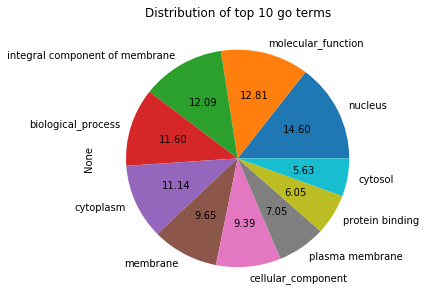

In [76]:
top_ten_of_go_term.plot(kind='pie', autopct='%.2f', figsize=(5, 5), title='Distribution of top 10 go terms');#***********************

In [53]:
from itertools import groupby
key_group = []
freq_group = []
for key, group in groupby(go_term_count):
    key_group.append(key)
    freq_group.append(len(list(group)))
key_group.sort()
freq_group.sort(reverse=True)

In [25]:
df_keys_freq = pd.DataFrame(freq_group, columns=['Count'], index=key_group)

In [26]:
df_keys_freq = df_keys_freq[:100]

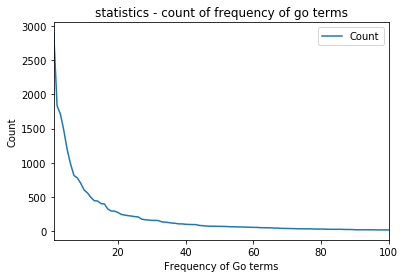

In [27]:
ax = df_keys_freq.plot(title='statistics - count of frequency of go terms')
ax.set_xlabel('Frequency of Go terms')
ax.set_ylabel('Count')

* As we can see above, the x-axis is the frequncy of temrs (go_term_count), the y-axis is the total count on these frequencies, which means that most of term show only once or very very few (<100)
* For instance, the frequency 1 has more than 2500 counts, which means that there are more than 2500 go terms that show only once